In [1]:
# تحميل المكتبات الأساسية
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile

# فك الضغط
with zipfile.ZipFile('/content/AB_NYC_2019.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [3]:
import pandas as pd

# قراءة الملف بعد فك الضغط
df = pd.read_csv('/content/AB_NYC_2019.csv')

# عرض أول 5 صفوف
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# معلومات عامة عن الأعمدة
df.info()

# إحصائيات رقمية
df.describe()

# عدد القيم الناقصة في كل عمود
df.isnull().sum()

# عدد الصفوف المكررة
df.duplicated().sum()

# عدد القيم الفريدة في كل عمود
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,0
id,48895
name,47905
host_id,37457
host_name,11452
neighbourhood_group,5
neighbourhood,221
latitude,19048
longitude,14718
room_type,3
price,674


In [5]:
# حذف الصفوف اللي ناقص فيها الاسم أو اسم المضيف
df.dropna(subset=['name', 'host_name'], inplace=True)

# تعويض القيم الفارغة في reviews_per_month بـ 0
df['reviews_per_month'].fillna(0, inplace=True)

/tmp/ipython-input-1623853053.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower().str.strip()
df['room_type'] = df['room_type'].str.lower().str.strip()

In [8]:
# إزالة الأسعار اللي أقل من أو تساوي 0
df = df[df['price'] > 0]

# إزالة الأسعار اللي أعلى من 1000 (حسب ما تشوف الطبيعي)
df = df[df['price'] < 1000]

In [9]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 48549 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48549 non-null  int64  
 1   name                            48549 non-null  object 
 2   host_id                         48549 non-null  int64  
 3   host_name                       48549 non-null  object 
 4   neighbourhood_group             48549 non-null  object 
 5   neighbourhood                   48549 non-null  object 
 6   latitude                        48549 non-null  float64
 7   longitude                       48549 non-null  float64
 8   room_type                       48549 non-null  object 
 9   price                           48549 non-null  int64  
 10  minimum_nights                  48549 non-null  int64  
 11  number_of_reviews               48549 non-null  int64  
 12  last_review                     38674

np.int64(0)

In [10]:
df.to_csv('/content/AB_NYC_2019_cleaned.csv', index=False)

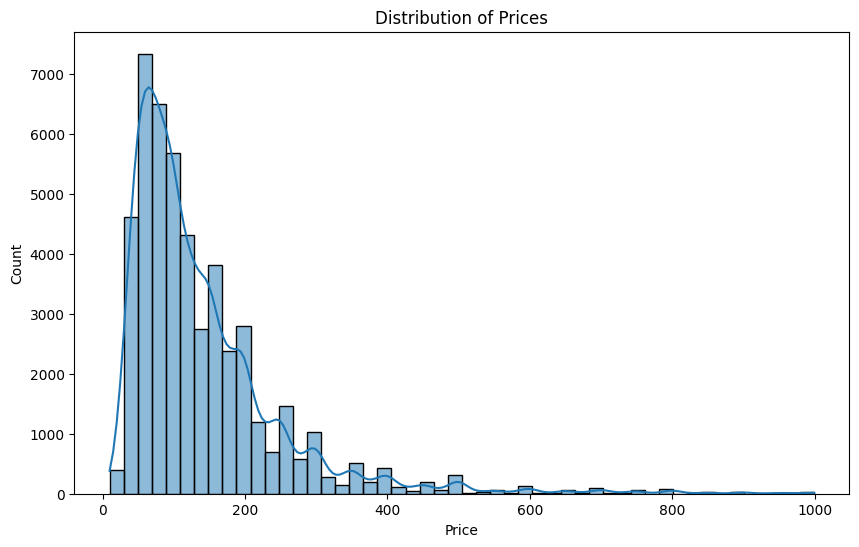

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

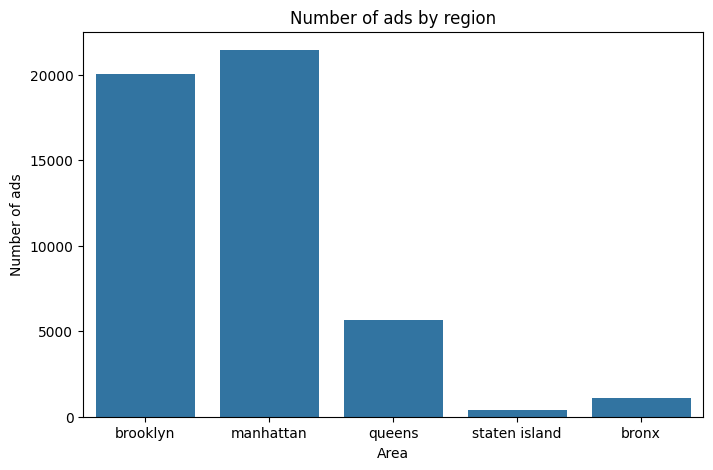

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Number of ads by region')
plt.xlabel('Area')
plt.ylabel('Number of ads')
plt.show()

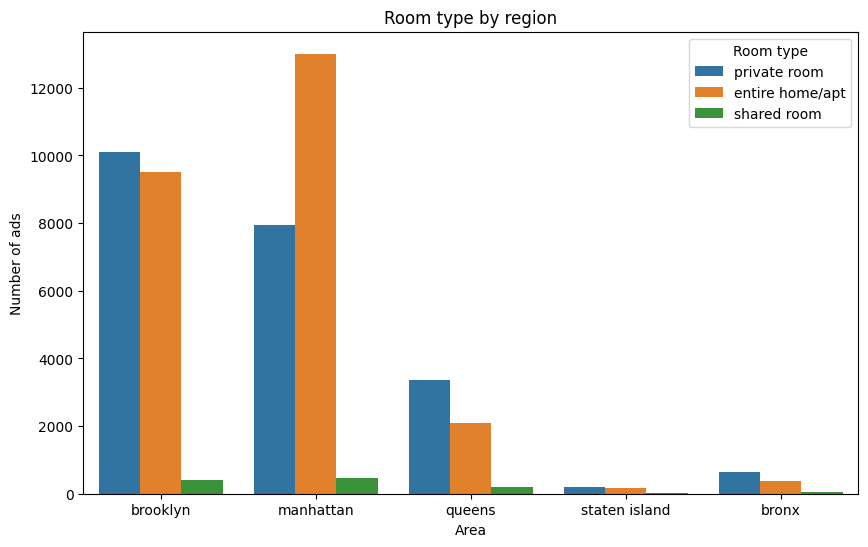

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Room type by region')
plt.xlabel('Area')
plt.ylabel('Number of ads')
plt.legend(title='Room type')
plt.show()

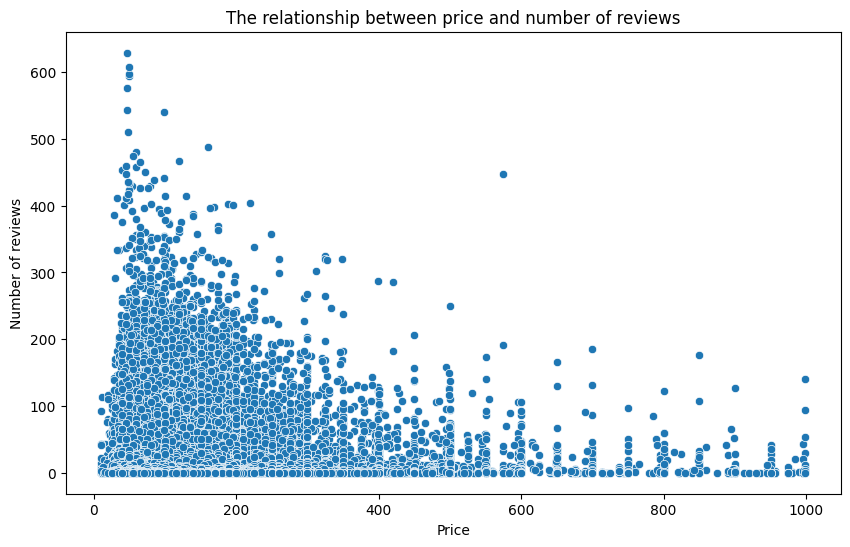

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='number_of_reviews')
plt.title('The relationship between price and number of reviews')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()